In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [2]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [7]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [8]:
from keras import models
from keras import layers

In [9]:
ip=X_train.shape
ip=ip[1]
ip

8

In [10]:
network=models.Sequential()
network.add(layers.Dense(10,activation='relu',input_shape=[ip,]))
network.add(layers.Dense(5,activation='relu'))
network.add(layers.Dense(1,activation='sigmoid'))

In [11]:
network.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:
network.fit(X_train,y_train,epochs=100,batch_size=16)

Epoch 1/100
34/34 [==============================] - 2s 3ms/step - loss: 0.6862 - accuracy: 0.6052
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 0.6696 - accuracy: 0.6499
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 0.6619 - accuracy: 0.6499
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 0.6563 - accuracy: 0.6499
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 0.6520 - accuracy: 0.6499
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 0.6470 - accuracy: 0.6499
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 0.6386 - accuracy: 0.6499
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 0.6317 - accuracy: 0.6518
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 0.6221 - accuracy: 0.6536
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 0.6100 - accuracy: 0.6667
Epoch 11/

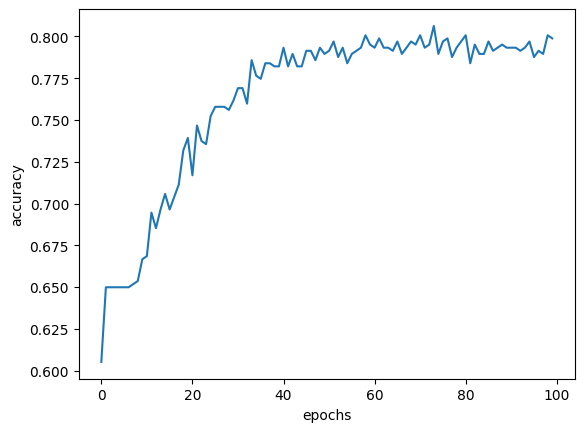

In [13]:
import matplotlib.pyplot as plt
history=network.history.history
plt.plot(history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()